# Ungraded Lab: Practice with the Keras Functional API

This lab will demonstrate how to build models with the Functional syntax. You'll build one using the Sequential API and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual.

## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [2]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

In [4]:
seq_model = build_model_with_sequential() # creating seq_model 

In [5]:
seq_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Functional API

And here is how you build the same model above with the functional syntax.

In [7]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.layers.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

## Build the model and visualize the model graph

You can choose how to build your model below. Just uncomment which function you'd like to use. You'll notice that the plot will look the same.

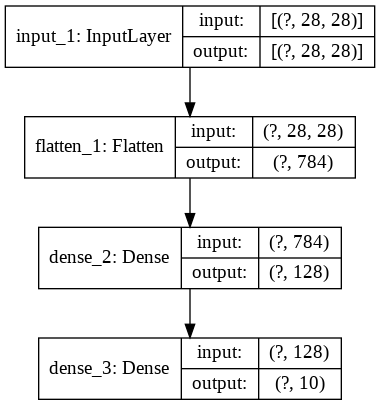

In [10]:
model = build_model_with_functional()
#model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

## Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [11]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist # get the data

(training_images, training_labels), (test_images, test_labels) = mnist.load_data() # creating train test datasets

training_images = training_images / 255.0  # normalizing dataset
test_images = test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5) # training the model with training data

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5000 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3732 - accuracy: 0.8653
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3323 - accuracy: 0.8797
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3111 - accuracy: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2925 - accuracy: 0.8928


In [13]:
model.evaluate(test_images, test_labels) # evaluating the model with test data

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3450 - accuracy: 0.8737


[0.34496063678264616, 0.8737]